# Prospects of opening a Restaurant in Paris, France. 

## What is the best place for my restaurant business in Paris?

---

## A.1. Background

Paris is the capital of France and the most populous city in this country. The City of Paris is part of île-de-France region and it is considered as one of economic centers in Europe. It is multicultural city and provides many business opportunities. It is also known by its history with presence of historical buildings and museum like museum of Louvre and a global cultural icon of France and one of the most recognizable structures in the world - The Eiffel Tower .
And in this beautiful, interesting city soon there will be a large and remarkable event – Summer Olympic Games. After a century of waiting, the French capital will once again be hosting the summer Olympic Games. 


The 2024 Summer Olympics (French: Jeux olympiques d'été de 2024) and commonly known as Paris 2024, is a forthcoming international multi-sport event that is scheduled to take place from 26 July to 11 August 2024 in Paris.


Such an event is a good reason for entrepreneurs to take the chance to open up their business and take their place in the restaurant market of Paris


## A.2. Problem Description & Objective 

Paris is famous by its culinary art and haute cuisine and presence of star-studded Chef. The city is home of the finest and most diverse haute cuisine restaurants in the world. In addition to French cuisine, food culture includes also an wide array of international cuisines influenced by multiculturalism of the town. 

Ahead of the Paris 2024 Summer Olympic and Paralympics Games,  
- can we  locate and recommend to anyone who wants to open a new restaurant or café in Paris which neighborhood will be best choice to start. 
- how could we provide support to different visitors to list and visualize Paris neighborhood (called arrondissements in French) that fit their needs in term of culinary/ food venues.

The success criteria of the project will be a good recommendation of neighborhood choice based on the existing palette of competitive venues.


- Who are the (Ho)ReCa competitors in that location?
- Cuisine served / Menu of the competitors
- Segmentation of the neighborhoods

## A.3. Target Audience

- Entrepreneurs and companies who want to invest, open or expand a restaurant business.
- Gastro-Tourist before visiting the city decide which area will be better and more interesting to visit and suit best for accommodating.
- Freelancers and companies who are interested in investing in real estate with an aim on the tourism industry.

---

## B. Data Description

For this project we need following data:

#### 1.	Paris data that contains list districts with their latitude and longitude:

Paris has in total 20 administrative districts (called Arrondissements Municipaux in French) and 80 small neighborhoods. 

The Arrondissements of Paris are not to be confused with the Parisian Quartiers (Paris Neighborhoods). Parisian Quartiers, like Belleville, Saint-Germain-des-Près and many more, are historic neighborhoods while the Arrondissements of Paris exist only since the 18 century. One Arrondissement usually includes many Paris Neighborhoods within its boundaries.

It is very easy to make mistakes and get confused further in the process

For the sake of order and simplicity we will use official names data. For example: “1erArdt” (Arrondissements) has “Louvre” as Naibourhood name
Data source:  Data from Open|DATA France https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

#### 2.	Restaurants and HoReCa venues in each neighborhood of Paris:

Data source: Foursquare APIs
By using this API we will get all the venues in each neighborhood. We can filter these venues to get only restaurants or filter with custom conditions to get different HoReCa venues. Drink&beverages or fast&snackfood for example.



---

## The Data Science Workflow


#### Outline the initial data that is required:
-- District data for Paris including names, location data if available, and any other details required.
#### Obtain the Data:
 -- Research and find suitable sources for the district data for Paris.
-- Access and explore the data to determine if it can be manipulated for our purposes.
#### Initial Data Wrangling and Cleaning:
-- Clean the data and convert to a useable form as a dataframe.

#### Data Analysis and Location Data:

 -- Foursquare location data will be leveraged to explore or compare districts around Paris.

-- Data manipulation and analysis to derive subsets of the initial data.

-- Identifying the high traffic areas using data visualization and statistical analysis.

#### Visualization:

-- Analysis and plotting visualizations.

-- Data visualization using various mapping libraries.

#### Discussion and Conclusions:

-- Recommendations and results based on the data analysis.

-- Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

---
### PROJECT CODE INITIALIZATION
#### Install and import corresponding libraries and modules

In [1]:
# Import base libraries 
import numpy as np 
import pandas as pd
from pandas import json_normalize 
import json 
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
# Seaborn visualization library
import seaborn as sns

In [3]:
# Import libraries for web scraping and to handle requests
!conda install -c conda-forge beautifulsoup4 --yes 
from bs4 import BeautifulSoup
import requests

Solving environment: done

# All requested packages already installed.



In [4]:
# Import library for convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

Solving environment: done

# All requested packages already installed.



In [5]:
# Import library for map rendering
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: done

# All requested packages already installed.



---

## C. Data Collection and Preparation


#### Retrieve the Paris District Data : Les Arrondissements Municipaux de Paris

Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.
This data and many other related data is available on the website of Mairie de Paris and Open|DATA France website and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

In [6]:
# Data for the arrondissements was downloaded from Paris|DATA corresponding page. 
# CSV file was downloaded and placed on the GitHub project repo for guaranteeing access regardless of the availability of the original file placement.
# https://raw.githubusercontent.com/Fenixkriss/IBM_Paris_Fashion/master/Paris_Arrondissements.csv
# Read dataset and convert it into a pandas dataframe.
paris_arr = pd.read_csv('https://raw.githubusercontent.com/Fenixkriss/IBM_Paris_Fashion/master/Paris_Arrondissements.csv')
print('Dataframe shape:', paris_arr.shape)
paris_arr.head(6)

Dataframe shape: (20, 11)


,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971


## C. Wrangling and Cleaning the Data

#### Renaming columns to general acceptance names and remove unnecessary columns.

In [7]:
# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement
# Rename the necessary columns 'Geometry_X' and 'Geometry_Y' to 'Latitude' and 'Longitude'
paris_arr.rename(columns={'NAME': 'Neighborhood', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)

# Remove unnecessary columns.
paris_arr.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)

print('Dataframe shape:', paris_arr.shape)
paris_arr.head(6)

Dataframe shape: (20, 5)


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971


In [8]:
# Sort data by arrondissement number for the sake of a nice look.
paris_arr.sort_values(by=['Arrondissement_Num'], inplace=True) 
paris_arr.reset_index(drop=True, inplace = True)

print('Dataframe shape:', paris_arr.shape)
paris_arr.head(6)

Dataframe shape: (20, 5)


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,1,Louvre,1er Ardt,48.862563,2.336443
1,2,Bourse,2eme Ardt,48.868279,2.342803
2,3,Temple,3eme Ardt,48.862872,2.360001
3,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
4,5,Pantheon,5eme Ardt,48.844443,2.350715
5,6,Luxembourg,6eme Ardt,48.849130,2.332898


---

### Intermediate MileStone

We now have located and imported the relevant data for the districts of Paris, and have constructed a dataframe.

Our business objective, strategy and methods to achieve our goal have been laid out, and a data workflow established.

Next up, we will leverage Foursquare location data to obtain data on high traffic areas - where consumers go for shopping, restaurants and entertainment - in all of the 20 districts.

---

In [9]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# User agent name is a drop of humor :D  
# Flânerie is the act of strolling, with all of its accompanying associations.
# The ability to wander detached from society with no other purpose than to be an acute observer of society.

geolocator = Nominatim(user_agent="Paris_flaneur")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


### Create a map of Paris with superimposed districts


In [10]:
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

In [11]:
map_paris = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=13)

# add circle shaped markers of districts
for lat, lng, label in zip(paris_arr['Latitude'], paris_arr['Longitude'], paris_arr['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)
Define Foursquare Credentials and Version

In [12]:
# Nazar T Foursquare account ID. I will change my credentials shortly after assignment completion.
# If you want to test code later by yourself then you need to set up your own Foursquare account and change ID & Secret by yours    
CLIENT_ID = 'QKUFDKCQ00KSGUEQ2VHEJDXWEARPF1S2QQ1YGK3BTYWWEL5Z' # my Foursquare ID
CLIENT_SECRET = 'AUEDDFFQMECF2TKAO0MLHQ2O4W4BMODLGZPKXODY2ZHR2XDG' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30

# D. Exploratory data analysis
Explore the first entry in our dataframe to become familiar with the data.

In [13]:
# Explore the first Neighborhood in our dataframe.
print('The first "{}" neighborhood is {}'.format(paris_arr.loc[0, 'Neighborhood'], paris_arr.loc[0, 'French_Name']))

The first "Louvre" neighborhood is 1er Ardt


In [14]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris_arr.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris_arr.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris_arr.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the 1er Ardt are 48.862562700000005, 2.336443362.


## Get the top 100 venues that are in the 1er Arrondissements (Louvre neighborhood) within a radius of 500 meters

In [15]:
limit = 100 # limit of number of venues returned by Foursquare API.
radius = 500 # Define radius. 500 is default number but good for start. 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, limit)

# Lets check whole URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QKUFDKCQ00KSGUEQ2VHEJDXWEARPF1S2QQ1YGK3BTYWWEL5Z&client_secret=AUEDDFFQMECF2TKAO0MLHQ2O4W4BMODLGZPKXODY2ZHR2XDG&v=20180604&ll=48.862562700000005,2.336443362&radius=500&limit=100'

In [16]:
# Send the GET request and examine the resutls
results = requests.get(url).json()

# We got a very big dictionary as result. After exploratory first look we can make some clarification for cleaner view.
results['response']['groups']

[{'type': 'Recommended Places',
  'name': 'recommended',
  'items': [{'reasons': {'count': 0,
     'items': [{'summary': 'This spot is popular',
       'type': 'general',
       'reasonName': 'globalInteractionReason'}]},
    'venue': {'id': '4adcda10f964a520af3521e3',
     'name': 'Musée du Louvre',
     'location': {'address': 'Rue de Rivoli',
      'crossStreet': 'Place du Carrousel',
      'lat': 48.86084691113991,
      'lng': 2.336440086364746,
      'labeledLatLngs': [{'label': 'display',
        'lat': 48.86084691113991,
        'lng': 2.336440086364746}],
      'distance': 190,
      'postalCode': '75001',
      'cc': 'FR',
      'neighborhood': 'Le Louvre',
      'city': 'Paris',
      'state': 'Île-de-France',
      'country': 'France',
      'formattedAddress': ['Rue de Rivoli (Place du Carrousel)',
       '75001 Paris',
       'France']},
     'categories': [{'id': '4bf58dd8d48988d18f941735',
       'name': 'Art Museum',
       'pluralName': 'Art Museums',
       'shortNam

## Find and Extract data for each venue

#### Select necessary part of results, flatten and filtering

In [17]:
# select necessary part of results and flatten
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) 

# filter only necessary columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

#### Define the function that extracts the category of the venues

In [18]:
# define a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Structure the json file into a pandas dataframe

In [19]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [20]:
print('Nearby_venues Dataframe shape:', nearby_venues.shape)
nearby_venues.head(4)

Nearby_venues Dataframe shape: (70, 4)


,name,categories,lat,lng
0,Musée du Louvre,Art Museum,48.860847,2.336440
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,La Clef Louvre Paris,Hotel,48.863977,2.336140


#### One request summary

In [21]:
# Let's see how many venues were found in 1eme Ardt within a radius of 500 meters.
print('{} venues were found and fetched from Foursquare.'.format(nearby_venues.shape[0]))

70 venues were found and fetched from Foursquare.


In [22]:
print ('{} unique categories in Chiyoda'.format(nearby_venues['categories'].value_counts().shape[0]))

35 unique categories in Chiyoda


## Scale the algorithm to apply it to all neighborhoods

#### Creating a near-by-venues function for neighborhoods requested by neighborhood names and coordinates

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create new near-by-venues storage dataframe

In [24]:
# Create a new dataframe and fill it
paris_venues = getNearbyVenues(names=paris_arr['French_Name'],
                                   latitudes=paris_arr['Latitude'],
                                   longitudes=paris_arr['Longitude'])

1er Ardt
2eme Ardt
3eme Ardt
4eme Ardt
5eme Ardt
6eme Ardt
7eme Ardt
8eme Ardt
9eme Ardt
10eme Ardt
11eme Ardt
12eme Ardt
13eme Ardt
14eme Ardt
15eme Ardt
16eme Ardt
17eme Ardt
18eme Ardt
19eme Ardt
20eme Ardt


In [25]:
print('Dataframe shape:',paris_venues.shape)
paris_venues.head(4)

Dataframe shape: (553, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1er Ardt,48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,1er Ardt,48.862563,2.336443,Palais Royal,48.863236,2.337127,Historic Site
2,1er Ardt,48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
3,1er Ardt,48.862563,2.336443,La Clef Louvre Paris,48.863977,2.336140,Hotel


In [26]:
paris_venues.tail(4)

,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
549,20eme Ardt,48.863461,2.401188,Maison Lecorvaisier,48.863884,2.399269,Bakery
550,20eme Ardt,48.863461,2.401188,Au Fond Du Jardin,48.864224,2.403797,Café
551,20eme Ardt,48.863461,2.401188,Tokyo Yaki,48.866222,2.397418,Japanese Restaurant
552,20eme Ardt,48.863461,2.401188,La Cantine Sicilienne,48.866965,2.397785,Italian Restaurant


#### Calculate how many unique venue categories there are in dataset for all neighborhoods.

In [27]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 144 unique venue categories.


---

## Cuisines

#### Let's evaluate how many different cuisines represented among top restaurants


In [28]:
# Create a selected Dataframe to Concentrate Only on Restaurants 
paris_resto = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
paris_resto.index = np.arange(1, len(paris_resto)+1)

In [29]:
print (paris_resto['Venue Category'].value_counts())

French Restaurant                77
Italian Restaurant               25
Japanese Restaurant              16
Vietnamese Restaurant            13
Restaurant                        9
Asian Restaurant                  7
Thai Restaurant                   7
Mediterranean Restaurant          6
Seafood Restaurant                5
Chinese Restaurant                4
Lebanese Restaurant               4
Korean Restaurant                 4
Indian Restaurant                 3
Israeli Restaurant                2
African Restaurant                2
Vegetarian / Vegan Restaurant     2
Turkish Restaurant                2
Sushi Restaurant                  2
Tapas Restaurant                  2
Scandinavian Restaurant           2
Portuguese Restaurant             2
Basque Restaurant                 2
Cambodian Restaurant              1
South American Restaurant         1
Gluten-free Restaurant            1
Russian Restaurant                1
Moroccan Restaurant               1
Corsican Restaurant         

In [30]:
print('There are {} uniques cuisines.'.format(len(paris_resto['Venue Category'].unique())))

There are 44 uniques cuisines.


Examine the first top ten results.

In [31]:
# create a dataframe of top 10 restaurant categories
paris_resto_top10 = paris_resto['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
paris_resto_top10.reset_index(inplace = True)

paris_resto_top10.iat[4, 0]='General Restaurant'
paris_resto_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)

paris_resto_top10

,Venue Category,Frequency
0,French Restaurant,77
1,Italian Restaurant,25
2,Japanese Restaurant,16
3,Vietnamese Restaurant,13
4,General Restaurant,9
5,Asian Restaurant,7
6,Thai Restaurant,7
7,Mediterranean Restaurant,6
8,Seafood Restaurant,5
9,Chinese Restaurant,4


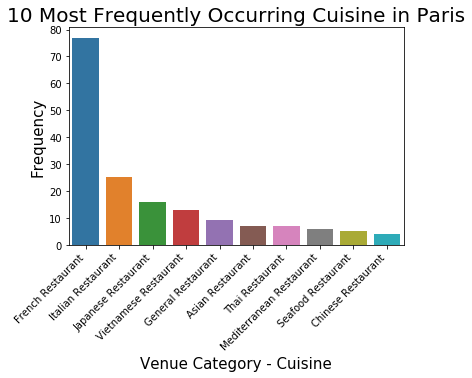

<Figure size 1584x720 with 0 Axes>

In [32]:
# Draw graph 
s=sns.barplot(x="Venue Category", y="Frequency", data=paris_resto_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occurring Cuisine in Paris', fontsize=20)
plt.xlabel("Venue Category - Cuisine", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Cousine.png", dpi=300)
fig = plt.figure(figsize=(22,10))
plt.show()

In [33]:
paris_resto

,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,1er Ardt,48.862563,2.336443,LouLou,48.862804,2.333500,Italian Restaurant
2,1er Ardt,48.862563,2.336443,Cibus,48.864757,2.335377,Italian Restaurant
3,1er Ardt,48.862563,2.336443,Sanukiya,48.864713,2.333805,Udon Restaurant
4,1er Ardt,48.862563,2.336443,Le Pot de Vins,48.864322,2.340193,Restaurant
5,1er Ardt,48.862563,2.336443,Ellsworth,48.865528,2.337057,French Restaurant
...,...,...,...,...,...,...,...
216,20eme Ardt,48.863461,2.401188,Le Papillon,48.861676,2.405698,French Restaurant
217,20eme Ardt,48.863461,2.401188,Shingané,48.865038,2.396166,Korean Restaurant
218,20eme Ardt,48.863461,2.401188,Futake,48.865083,2.397281,Japanese Restaurant
219,20eme Ardt,48.863461,2.401188,Tokyo Yaki,48.866222,2.397418,Japanese Restaurant


#### Let's calculate how many top rated restaurants are there in each Neighborhood

In [34]:
paris_resto_count = paris_resto.groupby(['French_Name'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
paris_resto_count=paris_resto_count.to_frame().reset_index()
paris_resto_count.rename(index=str, columns={"Venue Category": "Restaurants"}, inplace=True)
paris_resto_count.head(10)

,French_Name,Restaurants
0,10eme Ardt,12
1,11eme Ardt,16
2,13eme Ardt,24
3,14eme Ardt,13
4,15eme Ardt,19
5,16eme Ardt,1
6,17eme Ardt,14
7,18eme Ardt,14
8,19eme Ardt,10
9,1er Ardt,6


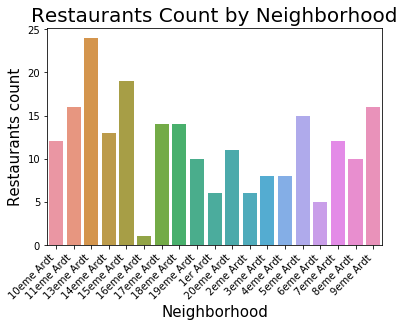

<Figure size 1584x720 with 0 Axes>

In [35]:
# Draw graph 
s=sns.barplot(x="French_Name", y="Restaurants", data=paris_resto_count)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Restaurants Count by Neighborhood', fontsize=20)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("Restaurants count", fontsize=15)
plt.savefig("Restaurants_count.png", dpi=300)
fig = plt.figure(figsize=(22,10))
plt.show()

## Café, Bar and Creperies

#### Let's examine  how many other different venues related to food and drink  represented among all selected venues


In [36]:
# Set Category List. Drink & Beverages
drink_cat=['Coffee','Shop Bar','Wine Bar','Juice Bar','Beer Bar','Tea Room','Brasserie']
ffood_cat=['Café','Bistro','Pastry Shop','Bakery','Creperie','Salad Place','Pizza Place','Sandwich Place','Ice Cream Shop']

In [37]:
# Create a selected Dataframe with Drink Category 
paris_drink = paris_venues[paris_venues['Venue Category'].str.contains('|'.join(drink_cat))].reset_index(drop=True)
paris_drink.index = np.arange(1, len(paris_drink)+1)
print (paris_drink['Venue Category'].value_counts())

Wine Bar       11
Coffee Shop    10
Tea Room        5
Beer Bar        4
Brasserie       3
Juice Bar       1
Name: Venue Category, dtype: int64


In [38]:
paris_drink_top10 = paris_drink['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
paris_drink_top10.reset_index(inplace = True)
paris_drink_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
paris_drink_top10

,Venue Category,Frequency
0,Wine Bar,11
1,Coffee Shop,10
2,Tea Room,5
3,Beer Bar,4
4,Brasserie,3
5,Juice Bar,1


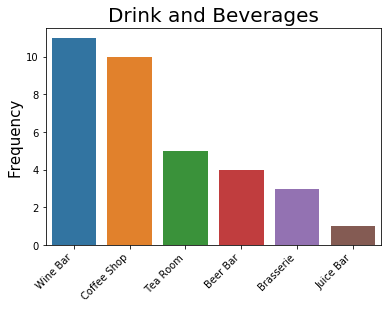

<Figure size 1584x720 with 0 Axes>

In [39]:
# Draw graph 
s=sns.barplot(x="Venue Category", y="Frequency", data=paris_drink_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Drink and Beverages', fontsize=20)
plt.xlabel("", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Top_Drinks.png", dpi=300)
fig = plt.figure(figsize=(22,10))
plt.show()

In [40]:
# Create a selected Dataframe with Café and Bistro Category 
paris_ffood = paris_venues[paris_venues['Venue Category'].str.contains('|'.join(ffood_cat))].reset_index(drop=True)
paris_ffood.index = np.arange(1, len(paris_ffood)+1)
print (paris_ffood['Venue Category'].value_counts())

Bakery            15
Bistro            12
Café              10
Pizza Place        8
Creperie           7
Sandwich Place     6
Ice Cream Shop     5
Pastry Shop        4
Salad Place        2
Name: Venue Category, dtype: int64


In [41]:
paris_ffood_top10 = paris_ffood['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
paris_ffood_top10.reset_index(inplace = True)
paris_ffood_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
paris_ffood_top10

,Venue Category,Frequency
0,Bakery,15
1,Bistro,12
2,Café,10
3,Pizza Place,8
4,Creperie,7
5,Sandwich Place,6
6,Ice Cream Shop,5
7,Pastry Shop,4
8,Salad Place,2


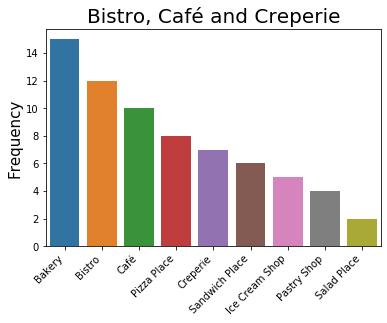

<Figure size 1584x720 with 0 Axes>

In [42]:
# Draw graph 
s=sns.barplot(x="Venue Category", y="Frequency", data=paris_ffood_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Bistro, Café and Creperie', fontsize=20)
plt.xlabel("", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Top_Bistro_Cafe.png", dpi=300)
fig = plt.figure(figsize=(22,10))
plt.show()

---

## Normalize aggregated data and analyze each of the Neighborhoods

#### Make one hot encoding with 'Venue Category' 

In [43]:
# one hot encoding
paris_norm = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_norm['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_norm.columns[-1]] + list(paris_norm.columns[:-1])
paris_norm = paris_norm[fixed_columns]

In [44]:
# Check dataframe 
print('Dataframe shape:',paris_norm.shape)
paris_norm.head(6)

Dataframe shape: (553, 145)


,Neighborhood,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basque Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,1er Ardt,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1er Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [45]:
paris_grouped = paris_norm.groupby('Neighborhood').mean().reset_index()

# Check dataframe 
print('Dataframe shape:', paris_grouped.shape)
paris_grouped.head(6)

Dataframe shape: (20, 145)


,Neighborhood,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basque Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.066667,0.0,0.000000,0.0,0.033333,0.033333,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,11eme Ardt,0.033333,0.000000,0.0,0.033333,0.0,0.033333,0.000000,0.033333,0.000000,...,0.0,0.0,0.0,0.0,0.033333,0.066667,0.0,0.0,0.0,0.0
2,12eme Ardt,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.2,0.2
3,13eme Ardt,0.000000,0.000000,0.0,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.233333,0.000000,0.0,0.0,0.0,0.0
4,14eme Ardt,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.040000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,15eme Ardt,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.033333,0.000000,0.033333,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


#### Group rows by neighborhood and sum of occurrence of each category

In [46]:
# This data set would be usefull later on
paris_grouped_sum = paris_norm.groupby('Neighborhood').sum().reset_index()

# Check dataframe 
print('Dataframe shape:', paris_grouped_sum.shape)
paris_grouped_sum.head(6)

Dataframe shape: (20, 145)


,Neighborhood,Afghan Restaurant,African Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basque Restaurant,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0,2,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11eme Ardt,1,0,0,1,0,1,0,1,0,...,0,0,0,0,1,2,0,0,0,0
2,12eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,13eme Ardt,0,0,0,0,0,5,0,0,0,...,0,0,0,0,7,0,0,0,0,0
4,14eme Ardt,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15eme Ardt,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Quick look at each neighborhood with it's top 10 most common venues

In [47]:
top_common_venues = 10
for neigh in paris_grouped['Neighborhood'].sort_values():
    print("----- {} -------------".format(neigh,))
    temp = paris_grouped[paris_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_common_venues))
    print('\n')

----- 10eme Ardt -------------
                      venue  freq
0         French Restaurant  0.13
1               Coffee Shop  0.10
2                      Café  0.07
3  Mediterranean Restaurant  0.07
4        African Restaurant  0.07
5                    Bistro  0.07
6                  Creperie  0.03
7                Boxing Gym  0.03
8                Taco Place  0.03
9              Burger Joint  0.03


----- 11eme Ardt -------------
                     venue  freq
0              Pastry Shop  0.07
1       Italian Restaurant  0.07
2               Restaurant  0.07
3                 Wine Bar  0.07
4                     Café  0.07
5        French Restaurant  0.07
6    Performing Arts Venue  0.03
7             Cocktail Bar  0.03
8  Comfort Food Restaurant  0.03
9           Sandwich Place  0.03


----- 12eme Ardt -------------
                      venue  freq
0               Zoo Exhibit   0.2
1  Bike Rental / Bike Share   0.2
2               Supermarket   0.2
3       Monument / Landmark   

## The top 10 venue categories for each neighborhood

#### Shrink the data. Make new dataframe only from top common venues.

In [48]:
# Creating a function to extract top common venues.
def return_most_common_venues(row, top_common_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_common_venues]

In [49]:
# Create the new dataframe. Arrondissements france name  and display the top 10 venues for each neighborhood
top_common_venues = 10
suffix = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_common_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, siffix[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_top_venues = pd.DataFrame(columns=columns)
paris_top_venues['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_top_venues.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], top_common_venues)

In [50]:
# final look of sorted data is
paris_top_venues

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Coffee Shop,Café,African Restaurant,Mediterranean Restaurant,Bistro,Flower Shop,Salad Place,Food & Drink Shop,Burger Joint
1,11eme Ardt,Wine Bar,Restaurant,Café,Pastry Shop,Italian Restaurant,French Restaurant,Afghan Restaurant,Korean Restaurant,Park,Comfort Food Restaurant
2,12eme Ardt,Zoo Exhibit,Bike Rental / Bike Share,Monument / Landmark,Supermarket,Zoo,Arts & Crafts Store,Ethiopian Restaurant,African Restaurant,Flower Shop,Fast Food Restaurant
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,French Restaurant,Chinese Restaurant,Juice Bar,Creperie,Park,Cambodian Restaurant,Gourmet Shop
4,14eme Ardt,French Restaurant,Hotel,Fast Food Restaurant,Food & Drink Shop,Brasserie,Convenience Store,Supermarket,Sushi Restaurant,Bistro,Tea Room
5,15eme Ardt,Italian Restaurant,Indian Restaurant,Thai Restaurant,Lebanese Restaurant,Japanese Restaurant,French Restaurant,Hotel,Ice Cream Shop,Russian Restaurant,Scandinavian Restaurant
6,16eme Ardt,Plaza,Park,Lake,Bus Stop,French Restaurant,Boat or Ferry,Bike Rental / Bike Share,Bus Station,Pool,Art Museum
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Bakery,Restaurant,Diner,Mediterranean Restaurant,Portuguese Restaurant,Bistro,Japanese Restaurant
8,18eme Ardt,French Restaurant,Bar,Restaurant,Indian Restaurant,Beer Store,Sandwich Place,Seafood Restaurant,Mediterranean Restaurant,Cheese Shop,Gastropub
9,19eme Ardt,French Restaurant,Bar,Bistro,Seafood Restaurant,Beer Bar,Hostel,Sandwich Place,Burger Joint,Brewery,Creperie


### Intermediate MileStone. Analysis and Discussion

This is a very useful results table that can provide at a glance information for all of the districts. Even once any conclusions are drawn further into the data workflow, we can refer back to this table for meaningful insights about the top categories of businesses in all the neighborhoods. Even without actual counts and numbers, it makes a great reference table.

As we can see, some districts have characteristic features. Some are dominated by classic restaurants, others, such as 15, are dominated by non-French restaurants (Italian, Indian and Thai cuisines).
The characteristics we obtained as a result of a clear analysis emphasize and confirm the obvious characteristics of the central areas in which there are many points of interest and in which institutions focus mainly on tourists and the tourism industry.

--- 

## E. Cluster Neighborhoods

#### Run k-means to cluster the neighborhood into 5 clusters

In [51]:
clust_num = 6
paris_grouped_clust = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=clust_num, random_state=0).fit(paris_grouped_clust)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 5, 2, 4, 3, 5, 0, 3, 1, 1], dtype=int32)

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [52]:
# reserved
paris_top_venues_labeled = paris_top_venues

In [53]:
# add clustering labels
paris_top_venues_labeled.insert(0, 'Cluster', kmeans.labels_)
paris_top_venues_labeled.rename(columns={'Neighborhood':'French_Name'}, inplace=True)

paris_merged = paris_arr

# merge paris_top_venues_labeled with paris_arr initial data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(paris_top_venues_labeled.set_index('French_Name'), on='French_Name')

In [54]:
print('Dataframe shape:', paris_merged.shape)
paris_merged.head(6) 

Dataframe shape: (20, 16)


,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude,Cluster,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Louvre,1er Ardt,48.862563,2.336443,5,Plaza,Art Museum,Italian Restaurant,Hotel,Historic Site,Pedestrian Plaza,Restaurant,Cheese Shop,Shoe Store,Spa
1,2,Bourse,2eme Ardt,48.868279,2.342803,1,Cocktail Bar,French Restaurant,Hotel,Pizza Place,Pedestrian Plaza,Plaza,Coffee Shop,Concert Hall,Perfume Shop,Nightclub
2,3,Temple,3eme Ardt,48.862872,2.360001,5,Sandwich Place,Burger Joint,Japanese Restaurant,Wine Bar,Italian Restaurant,Cocktail Bar,French Restaurant,Seafood Restaurant,Bubble Tea Shop,Farmers Market
3,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630,5,French Restaurant,Hotel,Wine Bar,Coffee Shop,Ice Cream Shop,Plaza,Memorial Site,Creperie,Cultural Center,Dessert Shop
4,5,Pantheon,5eme Ardt,48.844443,2.350715,1,French Restaurant,Bar,Plaza,Creperie,Ice Cream Shop,Sushi Restaurant,Peruvian Restaurant,Historic Site,Hotel,Chocolate Shop
5,6,Luxembourg,6eme Ardt,48.849130,2.332898,5,Fountain,Wine Bar,French Restaurant,Pharmacy,Miscellaneous Shop,Boutique,Lebanese Restaurant,Market,Electronics Store,Pub


#### Finally, let's visualize the resulting clusters

In [55]:
list_resto_count=paris_resto_count['Restaurants'].to_list()
list_neigh=paris_resto_count['French_Name'].to_list()

In [56]:
list_resto_count.append(2)
list_neigh.append('12eme Ardt')

In [ ]:
# create map
paris_map_resto = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', zoom_start=13)

# set color scheme for the clusters
x = np.arange(clust_num)
ys = [i + x + (i*x)**2 for i in range(clust_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], 
                                  paris_merged['Longitude'], 
                                  paris_merged['French_Name'], 
                                  paris_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_resto_count[list_neigh.index(poi)]*3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(paris_map_resto)
       
paris_map_resto

---

### Examine the Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can assign a name to each uster.

## Cluster 1. 

In [ ]:
paris_merged.loc[paris_merged['Cluster'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

## Cluster 2

In [ ]:
paris_merged.loc[paris_merged['Cluster'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

## Cluster 3

In [ ]:
paris_merged.loc[paris_merged['Cluster'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

## Cluster 4

In [ ]:
paris_merged.loc[paris_merged['Cluster'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

## Cluster 5

In [ ]:
paris_merged.loc[paris_merged['Cluster'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

---

In [ ]:
paris_arr


# F. Observations and Conclusions

## Cluster Analisys

As we can see, some districts have characteristic features. Some are dominated by classic restaurants, others, such as 15, are dominated by non-French restaurants (Italian, Indian and Thai cuisines).

The characteristics we obtained as a result of a clear analysis emphasize and confirm the obvious characteristics of the central areas in which there are many points of interest and in which institutions focus mainly on tourists and the tourism industry.

#### Cluster 1. HiClass. Restorant Cuisine, Hotels and Bars

* 5eme Ardt / Pantheon,
* 9eme Ardt / Opera,  
* 10eme Ardt / Entrepot, 
* 18eme Ardt / Buttes-Montmartre,
* 19eme Ardt / Buttes-Chaumont

#### Cluster 2. Bright, different, universally interesting cluster. Definitely deserves a detailed analysis

* 1er Ardt / Louvre
* 2eme Ardt / Bourse
* 3eme Ardt	Temple
* 4eme Ardt	Hotel-de-Ville
* 6eme Ardt	Luxembourg
* 15eme Ardt	Vaugirard
* 16eme Ardt	Passy
* 17eme Ardt	Batignolles-Monceau
* 20eme Ardt	Menilmontant


#### Cluster 3. Weak on tourist attraction places, but maybe it is possible to use weaknesses as strengths
* 12eme Ardt /Reuilly

#### Cluster 4. HiClass. Restorant Cuisine, Hotels and Bars
* 7eme Ardt / Palais-Bourbon,
* 8eme Ardt / elysee,
* 14eme Ardt / Observatoire

#### Cluster 5. Around the world cuisine restaurants
*  13eme Ardt / Gobelins

# G. Inferences and Discussion

The analysis shows that there are areas where there is a balanced number of restaurants, cafes and other catering venues. The result emphasizes the actual and general characteristics of the districts in the clusters. The opening of a restaurant in this area is quite reasonable.

The infrastructure of the districts already meets the needs of people for food and leisure. People are already considering these areas for lunch, dinner, meetings and evening rest. Any venue that opens in these areas will benefit from the status of the place and the habits of the people.


The high-level business question remains: whether to use the strengths of the place and compete in a classic, tight environment or to offer yourself in a less crowded niche. You can open as a classic restaurant, or if the analysis shows that small, fast food restaurants are in demand - open as a snackbar with chosen cuisine

This is where the part of the analysis that shows what type of institution dominates in the area can help. Accordingly, what is most in demand and what is the nature of consumers in this area. This analysis within this project is quite superficial, it shows the basic methods and opportunities. You can refine your search criteria and improve your analysis if the task is more thorough and specific.
But already now the preliminary analysis and especially clustering has revealed characteristic groups of areas on which it is possible to concentrate more specifically.
So, for further consideration, I would choose three clusters.

#### Cluster 1 and 4 as HiClass with Hi Cuisine Restaurant, Hotels and Bars, and Cluster 2 as universally interesting cluster who definitely deserves a detailed analysis.

We have made inferences from the data in making the location recommendations, but that is exactly the point. There is no right or wrong answer or conclusion for the task at hand. The job of data analysis here is to steer a course for the location selection of new restaurant (1) to meet the criteria of being in neighbourhoods that are lively with abundant leisure venues, and (2) to narrow the search down to just a few of the main areas that are best suited to match the criteria.

## Conclusions

There are many ways this analysis could have been performed based on different methodolgy and perhaps different data sources. I chose the method I selected as it was a straight forward way to narrow down the options, not complicating what is actually simple in many ways – meeting the the critera for the surrounding venues, and in my case, domain knowledge I have on the subject. The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific restaurant locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.

Without leveraging data to make focused decisions, the process could have been drawn out and resulted in new restaurants or cafe opening in sub-standard areas for this class or services. Data has helped to provide a better strategy and way forward, these data-driven decisions will lead to a better solution in the end.

## Personal Note

##### Thanks for taking part in my Data Science journey! 
##### I wish everyone to successfully complete this course! and necessarily, later on, visit Paris and appreciate the beauty of the city, the taste of the cuisine and discover the peculiarity of each neighborhood  on your own.


#### *Je reste à votre disposition.*
#### *Bien cordialement,*
#### *Nazar Tymtsan*